In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ml_utils.save_io as io
import numpy as np
import os
import seaborn as sns

In [3]:
main_path = os.path.expanduser("~/src/locgame/training_scripts/2d_games/")

In [4]:
exp_folder = "rewtarg"
model_folders = io.get_model_folders(os.path.join(main_path,exp_folder))
model_folders

['rewtarg_0_seed0_egoCentered1_absoluteCoords0_rew_alpha0.9',
 'rewtarg_1_seed0_egoCentered1_absoluteCoords0_rew_alpha1',
 'rewtarg_2_seed0_egoCentered1_absoluteCoords0_rew_alpha0.7',
 'rewtarg_3_seed121300_egoCentered1_absoluteCoords0_rew_alpha0.9',
 'rewtarg_4_seed121300_egoCentered1_absoluteCoords0_rew_alpha1',
 'rewtarg_5_seed121300_egoCentered1_absoluteCoords0_rew_alpha0.7',
 'rewtarg_6_seed121320_egoCentered1_absoluteCoords0_rew_alpha0.9',
 'rewtarg_7_seed121320_egoCentered1_absoluteCoords0_rew_alpha1']

In [5]:
def get_df(main_path, exp_folder, model_folders, idxs):
    df = pd.DataFrame()
    for idx in idxs:
        model_path = os.path.join(main_path,exp_folder,model_folders[idx])
        df_path = os.path.join(model_path,"model_data.csv")
        new_df = pd.read_csv(df_path,sep="!")
        new_df['model_name'] = model_folders[idx]
        df = df.append(new_df,sort=True)
    df["Model Type"] = exp_folder
    return df

In [5]:
idxs = 
df = get_df(main_path, exp_folder, model_folders, idxs)
df

,epoch,model_name,train_loss,train_pred_loss,train_rew,train_rew_loss,val_rew,Model Type
0,0,egocentered_4_lr0.00025,1.492201,1.513708,-3.077020,1.298642,-2.037308,egocentered
1,1,egocentered_4_lr0.00025,1.078325,1.163187,-2.362955,0.314563,-1.992493,egocentered
2,2,egocentered_4_lr0.00025,0.765173,0.795715,-1.617820,0.490289,-0.331320,egocentered
3,3,egocentered_4_lr0.00025,0.078633,0.084342,-0.168762,0.027254,-0.255273,egocentered
4,4,egocentered_4_lr0.00025,0.055143,0.059044,-0.118177,0.020033,-0.211763,egocentered
...,...,...,...,...,...,...,...,...
110,110,egocentered_4_lr0.00025,0.012345,0.013336,-0.026733,0.003429,-0.035685,egocentered
111,111,egocentered_4_lr0.00025,0.013272,0.014306,-0.028666,0.003961,-0.079123,egocentered
112,112,egocentered_4_lr0.00025,0.012957,0.013945,-0.027948,0.004060,-0.007211,egocentered
113,113,egocentered_4_lr0.00025,0.013190,0.014219,-0.028509,0.003935,-0.033204,egocentered


In [7]:
exp_folder2 = "allorelative"
model_folders = io.get_model_folders(os.path.join(main_path,exp_folder2))
model_folders

['allorelative_0_lr0.00025']

In [8]:
idxs = [0]
df2 = get_df(main_path, exp_folder2, model_folders, idxs)

In [9]:
comb_df = df.append(df2,sort=True)
comb_df

,Model Type,epoch,model_name,train_loss,train_pred_loss,train_rew,train_rew_loss,val_rew
0,egocentered,0,egocentered_4_lr0.00025,1.492201,1.513708,-3.077020,1.298642,-2.037308
1,egocentered,1,egocentered_4_lr0.00025,1.078325,1.163187,-2.362955,0.314563,-1.992493
2,egocentered,2,egocentered_4_lr0.00025,0.765173,0.795715,-1.617820,0.490289,-0.331320
3,egocentered,3,egocentered_4_lr0.00025,0.078633,0.084342,-0.168762,0.027254,-0.255273
4,egocentered,4,egocentered_4_lr0.00025,0.055143,0.059044,-0.118177,0.020033,-0.211763
...,...,...,...,...,...,...,...,...
51,allorelative,51,allorelative_0_lr0.00025,0.110450,0.116762,-0.234276,0.053638,-0.300237
52,allorelative,52,allorelative_0_lr0.00025,0.108261,0.114707,-0.229813,0.050250,-0.284257
53,allorelative,53,allorelative_0_lr0.00025,0.109403,0.115886,-0.232422,0.051057,-0.196680
54,allorelative,54,allorelative_0_lr0.00025,0.109555,0.115799,-0.232237,0.053354,-0.333003


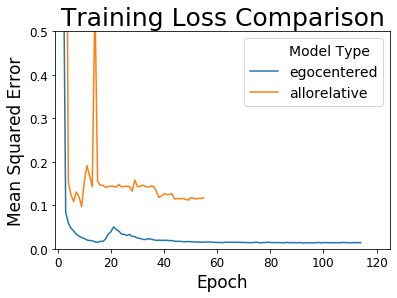

In [10]:
sns.lineplot(x="epoch", y="train_pred_loss",data=comb_df,hue="Model Type")
plt.ylim([0,.5])
plt.xlim([-1,125])
plt.title("Training Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

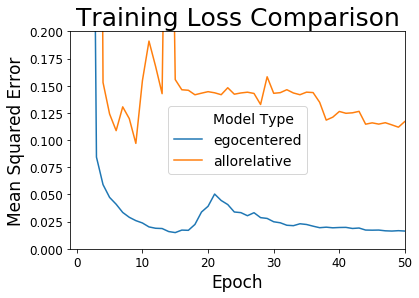

In [11]:
sns.lineplot(x="epoch", y="train_pred_loss",data=comb_df,hue="Model Type")
plt.ylim([0,.2])
plt.xlim([-1,50])
plt.title("Training Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

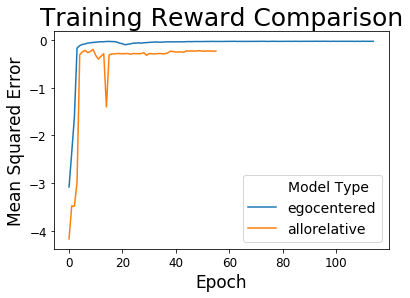

In [12]:
sns.lineplot(x="epoch", y="train_rew",data=comb_df,hue="Model Type")
plt.title("Training Reward Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

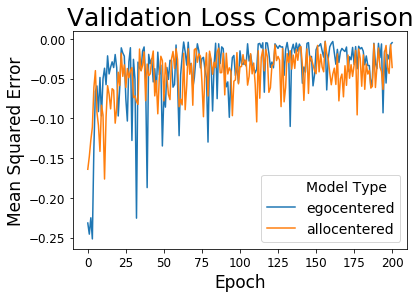

In [44]:
sns.lineplot(x="epoch", y="val_rew",data=comb_df,hue="Model Type")
plt.title("Validation Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)